# Metadata

```yaml
Course:   DS 5100
Module:   05 Numpy HW
Topic:    Capital Asset Pricing Model (CAPM)
Author:   R.C. Alvarado (revised)
Date:     7 July 2023
```

# Student Info

* Name: Courtney Hodge
* Net ID: yss2zv
* URL of this file in GitHub:

# Instructions

In your **private course repo on Rivanna**, use this Jupyter notebook and the data file `capm_market_data.csv` to write code that performs the tasks below. The data file is in the HW directory of this module in the course repo.

Save your notebook in the `M05` directory.

Remember to add and commit these files to your repo.

Then push your commits to your repo on GitHib.

Be sure to fill out the **Student Info** block above.

To submit your homework, save the notebook as a PDF and upload it to GradeScope, following the instructions.

**TOTAL POINTS: 10**

# Overview

<!-- In this exer Use NumPy and functions to
* compute a stock's CAPM beta
* perform sensitivity analysis
* understand how the data points impact the beta estimate
 -->

In finance, a capital asset pricing model (CAPM) is a single-factor regression model used to explain and predict excess stock returns.

There are better, more accurate models, but CAPM has its uses.

For example, the **market beta** $\beta_i$ a useful output.

Here is the formula for calculating the expected excess return:

$E[R_i] - R_f  = \beta_i ( E[R_m] - R_f )$

where:

* $ER_i$: expected return of stock $i$
* $R_f$: risk-free rate
* $\beta_i$: market beta of the stock
* $ER_m - R_f$: market risk premium

**Review the instructions below to complete the requested tasks.**

**TOTAL POINTS: 10**

# Setting Up

In [1]:
import numpy as np

Define Risk-free Treasury rate. You will use this constant below.

In [2]:
R_f = 0.0175 / 252

# Prepare the Data

We import the data and convert it into usable Numby arrays.

**Read in the market data**

The values are closing prices, adjusted for splits and dividends.

The prefixes of the second two columns are based on the following codes:
* SPY is an ETF for the S&P 500 (i.e. the stock market as whole)
* AAPL stands for Apple  

In [7]:
data_file = "capm_market_data-2.csv"

In [8]:
data_2D = np.array([row.strip().split(',') for row in open(data_file, 'r').readlines()])

data_2D

array([['date', 'spy_adj_close', 'aapl_adj_close'],
       ['2020-01-02', '321.555786132812', '298.829956054687'],
       ['2020-01-03', '319.120910644531', '295.924713134766'],
       ['2020-01-06', '320.33837890625', '298.28271484375'],
       ['2020-01-07', '319.437652587891', '296.8798828125'],
       ['2020-01-08', '321.140106201172', '301.655548095703'],
       ['2020-01-09', '323.317626953125', '308.06298828125'],
       ['2020-01-10', '322.38720703125', '308.759399414062'],
       ['2020-01-13', '324.604400634766', '315.355865478516'],
       ['2020-01-14', '324.109497070312', '311.097534179687'],
       ['2020-01-15', '324.841918945312', '309.764312744141'],
       ['2020-01-16', '327.544097900391', '313.644561767578'],
       ['2020-01-17', '328.563598632812', '317.116943359375'],
       ['2020-01-21', '327.920227050781', '314.967864990234'],
       ['2020-01-22', '327.959808349609', '316.092163085937'],
       ['2020-01-23', '328.3359375', '317.614410400391'],
       ['2020-

**Separete columns from the data**

In [9]:
COLS = np.str_(data_2D[0])

In [10]:
COLS

"['date' 'spy_adj_close' 'aapl_adj_close']"

**Separate columns by data types**

Numpy wants everything to in a data structure to be of the same type.

In [12]:
DATES = data_2D[1:, 0]

In [13]:
RETURNS = data_2D[1:, 1:].astype('float')

# Task 1

(1 PT)

Print the first 5 rows of the `RETURNS` table.

In [14]:
# CODE HERE

print(RETURNS[:5,:])

[[321.55578613 298.82995605]
 [319.12091064 295.92471313]
 [320.33837891 298.28271484]
 [319.43765259 296.87988281]
 [321.1401062  301.6555481 ]]


# Task 2

(1 PT)

Print the first five values from the SPY column in `RETURNS`.

Then do the same for the AAPL column.

Use one cell for each operation.


In [15]:
# CODE HERE
#first five for SPY
print(RETURNS[:5,0])

[321.55578613 319.12091064 320.33837891 319.43765259 321.1401062 ]


In [16]:
#first five for AAPL
print(RETURNS[:5, 1])

[298.82995605 295.92471313 298.28271484 296.87988281 301.6555481 ]


# Task 3

(1 PT)

Compute the excess returns by subtracting the constant `R_f` from `RETURNS`.

Save the result as numpy 2D array (i.e. a table) named `EXCESS`.

Print the LAST five rows from the new table.

In [17]:
EXCESS = RETURNS - R_f

In [18]:
print(EXCESS[-5:, ])

[[314.37993544 383.00994032]
 [317.58992689 383.67992323]
 [314.83992689 381.90993422]
 [318.91994398 388.22994154]
 [321.84993666 390.89992445]]


# Task 4

(1 PT)

Make a simple [scatterplot using Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) with SPY excess returns on the x-axis, AAPL excess returns on the y-axis.

Hint: Use the following code:

```python
from matplotlib.pyplot import scatter

scatter(<x>, <y>)
```
Replace `<x>` and `<y>` with the appropriate vectors.

You may want to save the vectors for the SPY and AAPL columns as `x` and `y` respectively. This will make it visually easier to perform Task 6.

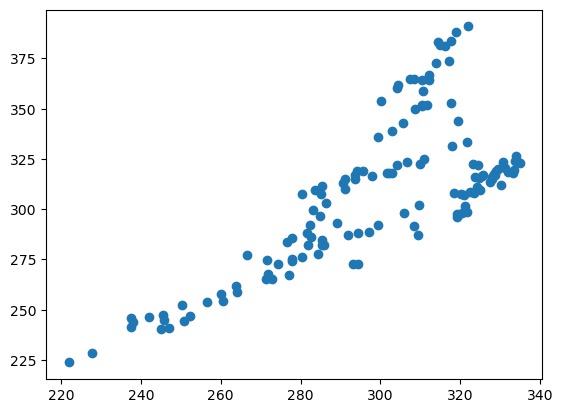

In [20]:
# CODE HERE
x = EXCESS[:, 0]    #SPY
y = EXCESS[:, 1]    #AAPL

from matplotlib.pyplot import scatter

scatter(x,y);

# Taks 5

(3 PTS)

Use the **normal equation**, listed below, to compute the Regression Coefficient Estimate of the data plotted above, $\hat\beta_i$.

Note that $x^T$ denotes the transpose of $x$.

$\begin{aligned} \hat\beta_i=(x^Tx)^{−1}x^Ty \end{aligned}$

Use the Numpy functions for matrix to do this &mdash; multiplication, transpose, and inverse.

Note, however, that since $x$ in this case a single column matrix, i.e. a vector, the result of $x'x$ will be a scalar, which is not invertable. So you can just invert the result by division, i.e.

$\hat\beta_i = \large\frac{1}{x^Tx} \small(x^Ty)$

Be sure to review what these operations do, and how they work, if you're a bit rusty.

In [26]:
beta_est = (1 / np.matmul(x.T, x)) * (np.matmul(x.T, y))

In [27]:
beta_est

1.029980294240815

# Task 6

(3 PTS)

**Measuring Beta Sensitivity to Dropping Observations (Jackknifing)**

Let's understand how sensitive the beta is to each data point.   
We want to drop each data point (one at a time), compute \\(\hat\beta_i\\) using our formula from above, and save each measurement.

Write a function called `beta_sensitivity()` with these specs:

- Take numpy arrays x and y as inputs.
- For each observation i, compute the beta without the current observation. You can use a `lambda` function for this.
- Return a list of tuples each containing the observation row dropped and the beta estimate, i.e. something like `(i, beta_est)`, depending how you've named your variables.

Hint: `np.delete(x, i)` will delete observation i from array x.

In [30]:
# CODE HERE
def beta_sensitivity(x, y):
  """
  beta_sensitivity takes numpy arrays x and y as inputs.
  For each observation i, compute the beta without the current observation.
  """

  beta_list = []            #create empty beta list

  for i in range (len(x)):  #loop through each observation
    x_new = np.delete(x, i)
    y_new = np.delete(y, i)

    #lambda function to calculate beta est
    cur_beta_est = lambda x,y: (1 / (np.matmul(x.T,x))) * np.matmul(x.T,y)

    #call to beta est
    beta_est = cur_beta_est(x_new, y_new)

    #append to beta list
    beta_list.append((i, beta_est))

  return beta_list

In [31]:
beta_sensitivity(x, y)[:5]

[(0, 1.030847730172396),
 (1, 1.0308516176393125),
 (2, 1.0308255236222597),
 (3, 1.0308357542837523),
 (4, 1.030759501843587)]